# 1. Importing libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Loading dataset

In [114]:
df = pd.read_csv("dataset/student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


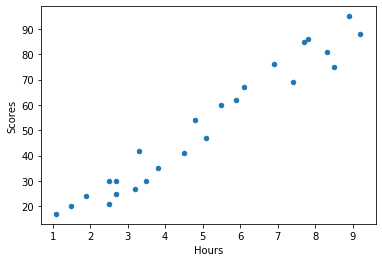

In [115]:
df.plot.scatter(x="Hours", y="Scores")

# 3. Splitting data into train/test

In [152]:
np.random.seed(0)
X = df["Hours"].values
y = df["Scores"].values

scalerX = StandardScaler()
scalerY = StandardScaler()

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.65, test_size = 0.35, random_state = 100)

# 5. Training the linear regression model

In [153]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

# 6. Testing the model

In [154]:
y_pred = lm.predict(X_test)

# 7. Evaluating the model

In [155]:
MSE = mean_squared_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print("MSE = ", MSE)
print("R² = ", R2)

MSE =  0.04221646917779284
R² =  0.9470651238166582


# 8. Inspection of the test results

In [156]:
y_pred_train = lm.predict(X_train)

In [157]:
y_test = scalerY.inverse_transform(y_test)
y_pred = scalerY.inverse_transform(y_pred)
y_pred_train = scalerY.inverse_transform(y_pred_train)


X_test = scalerX.inverse_transform(X_test)
X_train = scalerX.inverse_transform(X_train)
y_train = scalerY.inverse_transform(y_train)

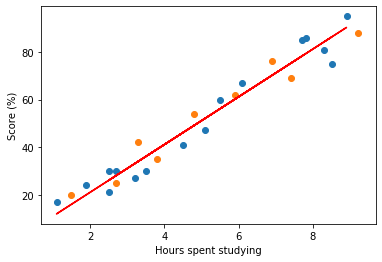

In [158]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred_train, "r")
plt.scatter(X_test, y_test)

_ = plt.ylabel("Score (%)")
_ = plt.xlabel("Hours spent studying")

In [159]:
TestingData=pd.DataFrame(data=y_test, columns=["actual score"])
TestingData['LR predicted score']=y_pred

TestingData

,actual score,LR predicted score
0,25.0,28.015937
1,35.0,39.068383
2,42.0,34.044544
3,62.0,60.168506
4,20.0,15.958724
5,69.0,75.240023
6,76.0,70.216184
7,54.0,49.116060
8,88.0,93.325843


# Conclusion
- Linear models are most often not very accurate regressors
- Data too small, it doesn't allow for a diversification during the train/test grouping